# Function optimization using Simulated Annealing

* Simple quadratic function
* [Bohachevsky function](https://www.sfu.ca/~ssurjano/boha.html)
* [Bukin function](https://www.sfu.ca/~ssurjano/bukin6.html)
* [Gramacy \& Lee function](https://www.sfu.ca/~ssurjano/grlee12.html)
* [Griewank 1D function](https://www.sfu.ca/~ssurjano/griewank.html)
* [Griewank 2D function](https://www.sfu.ca/~ssurjano/griewank.html)
* [Griewank 3D function](https://www.sfu.ca/~ssurjano/griewank.html)

In [1]:
import math
import numpy as np
from optalgotools.algorithms import SimulatedAnnealing
from optalgotools.problems import ProblemBase, ContinuousFunctionBase

# Solving a simple quadratic function using SA

## $f(x)=(x-6)^2$ , $x\in [0,31]$

In [2]:
# define the objective function
def simple_example(x):
    return (x-6)**2

# define the bounds
simple_example_bounds = np.asarray([[0, 31]])

#create a continous function instance
simple_example_obj = ContinuousFunctionBase(simple_example, simple_example_bounds)

# define SA solver. Adding debug = 1 to print initial and final solution
sa = SimulatedAnnealing(max_iter=1000, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=1)
# run the solver
sa.run(simple_example_obj)

Simulated annealing is initialized:
current value = 90.95365420666515, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 4.725888880630934e-09, curr temp:9.97938882337113e-05, curr best: sol: [5.99993125]


In [3]:
# Adding debug=2 (debug>1) for iteration tracing
sa_iter = SimulatedAnnealing(max_iter=100, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9, debug=2)

# show the steps
sa_iter.run(simple_example_obj)

Simulated annealing is initialized:
current value = 169.00564356362534, current temp=1000
curr iter: 1, curr value: 21.632585529622105, curr best value: 0.0176890321824274, curr temp:1000, curr best: sol: [5.86699988]
curr iter: 2, curr value: 216.14884808737742, curr best value: 0.0176890321824274, curr temp:900.0, curr best: sol: [5.86699988]
curr iter: 3, curr value: 234.1288710066264, curr best value: 0.0176890321824274, curr temp:810.0, curr best: sol: [5.86699988]
curr iter: 4, curr value: 80.60906621859436, curr best value: 0.0176890321824274, curr temp:729.0000000000001, curr best: sol: [5.86699988]
curr iter: 5, curr value: 186.05783036733976, curr best value: 0.0176890321824274, curr temp:656.1, curr best: sol: [5.86699988]
curr iter: 6, curr value: 0.03743438207080591, curr best value: 0.0176890321824274, curr temp:590.4900000000001, curr best: sol: [5.86699988]
curr iter: 7, curr value: 11.213886527026474, curr best value: 0.0021723520213433834, curr temp:531.441, curr best

global minimum: x = 5.9996, f(x) = 0.0000


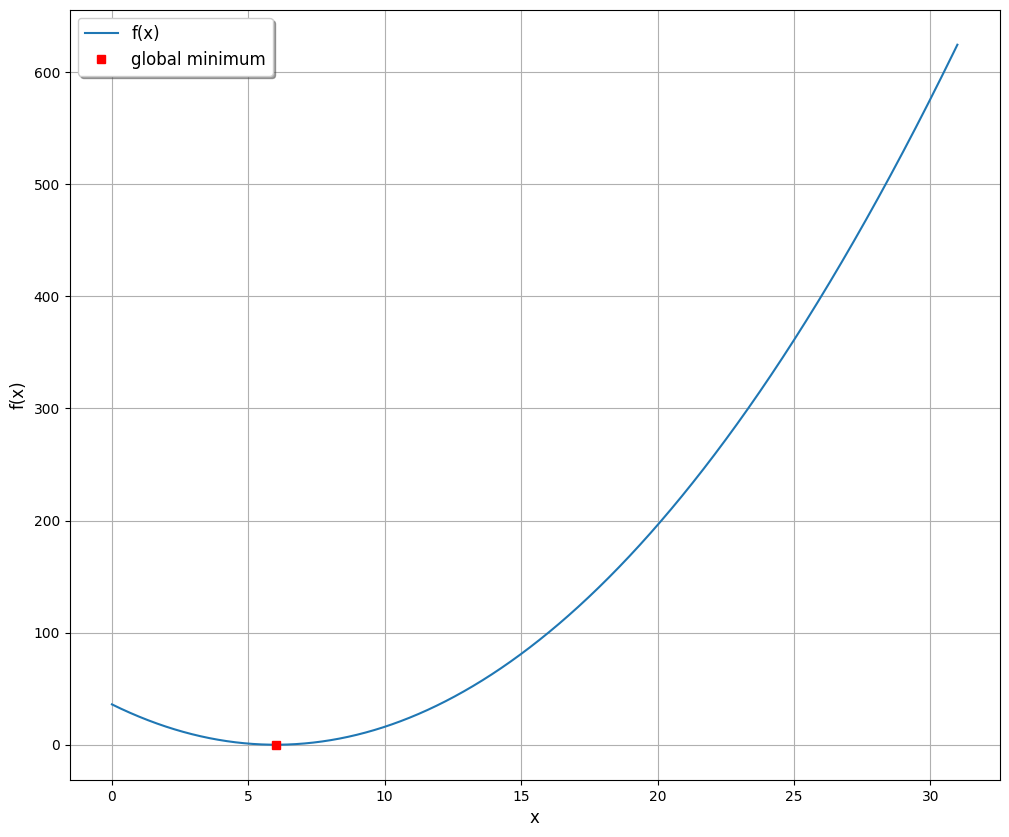

In [4]:
# plot the function and the solution
simple_example_obj.plot(sa_iter.s_best)

# Solving Bohachevsky function using SA

## $f(x_1,x_2)={x_1}^2 +2{x_2}^2-0.3cos(3\pi x_1)-0.4cos(4\pi x_2)+0.7$ , $x_1\in [-100,100]$ and $x_2\in [-100,100]$

In [5]:
def Bohachevsky(x_1, x_2):
    return x_1**2 +2*(x_2**2)-0.3*np.cos(3*np.pi*x_1)-0.4*np.cos(4*np.pi*x_2)+0.7

Bohachevsky_bounds = np.asarray([[-100, 100], [-100, 100]])
Bohachevsky_obj = ContinuousFunctionBase(Bohachevsky, Bohachevsky_bounds, 5)

In [6]:
sa.run(Bohachevsky_obj)

Simulated annealing is initialized:
current value = 1139.3034495867414, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.1889440299191404, curr temp:9.97938882337113e-05, curr best: sol: [0.02856831 0.07527062]


global minimum: x = 0.0286, 0.0753, f(x) = 0.1889


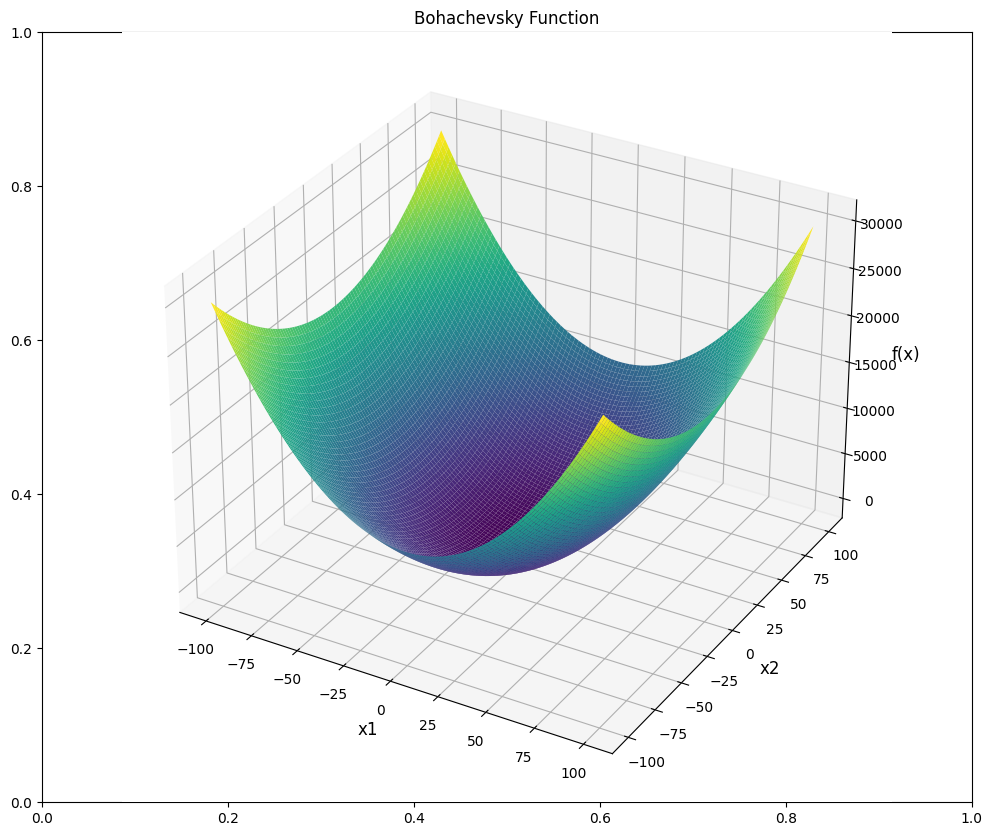

In [7]:
Bohachevsky_obj.plot(sa.s_best,'Bohachevsky Function')

# Solving Bukin function using SA

## $f(x_1,x_2)=100\sqrt|x_2-0.01{x_1}^2| + 0.01|x_1 + 10|$ , $x_1\in [-15,-5]$ and $x_2\in [-3,3]$

In [8]:
def bukin(x_1, x_2):
    return 100*math.sqrt(abs(x_2-0.01*x_1**2)) + 0.01 * abs(x_1 + 10)

bukin_bounds = np.asarray([[-15, -5], [-3, 3]])
bukin_obj = ContinuousFunctionBase(bukin, bukin_bounds, 5)

In [9]:
sa.run(bukin_obj)

Simulated annealing is initialized:
current value = 183.62092196207374, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 1.7539983518428177, curr temp:9.97938882337113e-05, curr best: sol: [-6.73236102  0.45354314]


global minimum: x = -6.7324, 0.4535, f(x) = 1.7540


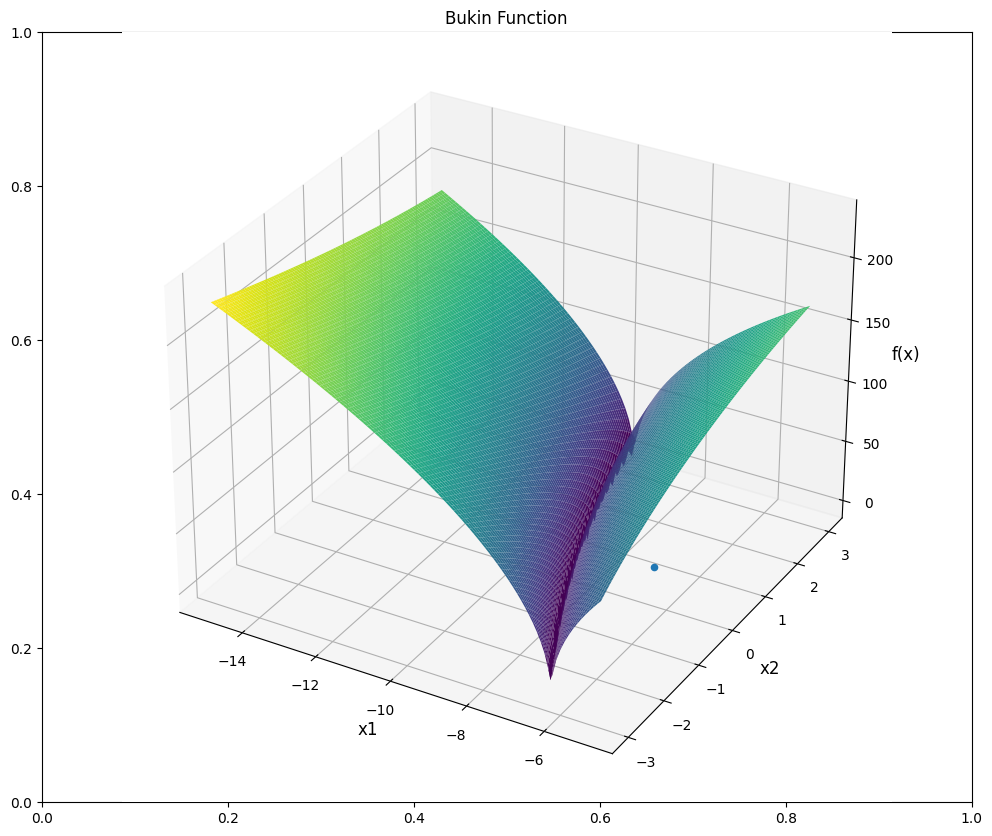

In [10]:
bukin_obj.plot(sa.s_best,'Bukin Function')

# Solving Gramacy & Lee function using SA

## $f(x)=\frac{sin(10\pi x)}{2x} + (x-1)^4$ , $x\in [0.5,2.5]$

In [11]:
def gramacy_and_lee(x):
    return math.sin(10*math.pi*x)/(2*x) + (x-1)**4

gramacy_and_lee_bounds = np.asarray([[0.5, 2.5]])
gramacy_and_lee_obj = ContinuousFunctionBase(gramacy_and_lee, gramacy_and_lee_bounds, .1)

In [12]:
sa.run(gramacy_and_lee_obj)

Simulated annealing is initialized:
current value = -0.7433527136527514, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: -0.8690108782636143, curr temp:9.97938882337113e-05, curr best: sol: [0.54853956]


global minimum: x = 0.5485, f(x) = -0.8690


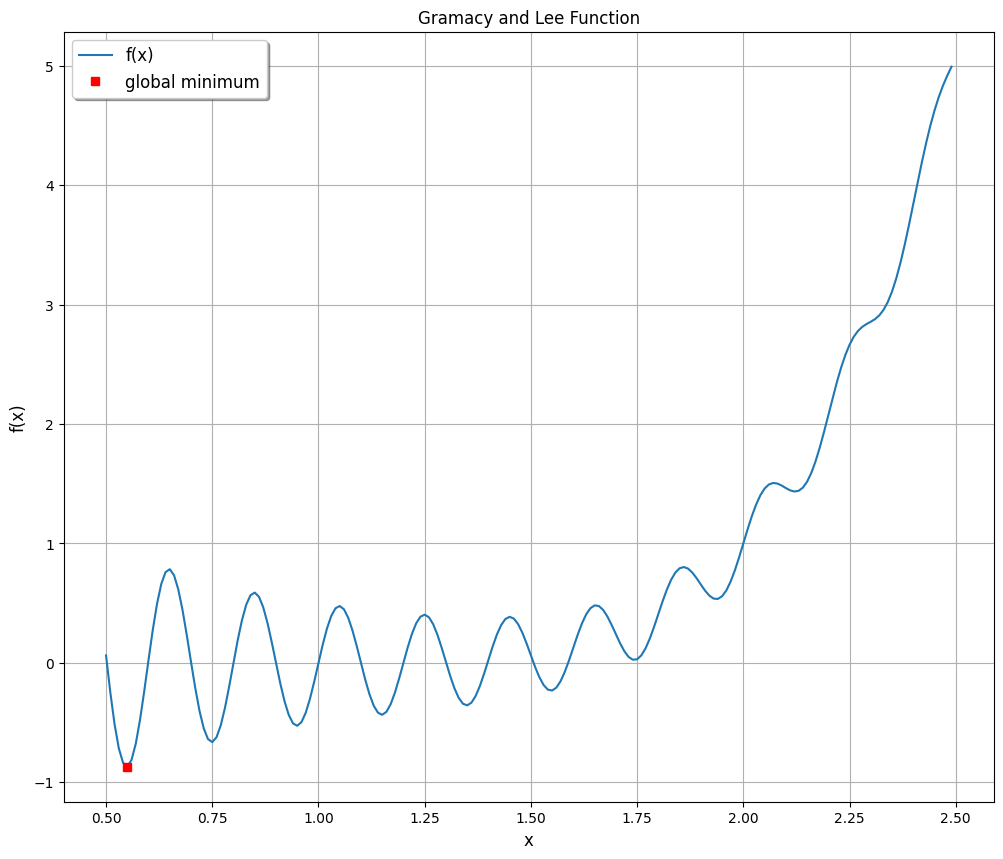

In [13]:
gramacy_and_lee_obj.plot(sa.s_best,'Gramacy and Lee Function')

# Solving Griewank 1D function using SA

## $f(x)=\sum_{i=1}^{d} \frac{{x_i}^2}{4000} + \prod_{i=1}^{d} cos(\frac{x_i}{\sqrt{i}}) +1 $ , $x\in [-600, 600]$

In [14]:
def griewank(*x):
    x = np.asarray(x)
    return np.sum(x**2/4000) - np.prod(np.cos(x/np.sqrt(np.asarray(range(1, len(x)+1))))) + 1

griewank_bounds = np.asarray([[-600, 600]])
griewank_1d=ContinuousFunctionBase(griewank, griewank_bounds, 10)

In [15]:
sa.run(griewank_1d)

Simulated annealing is initialized:
current value = 77.44127363398235, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 3.52635104894361e-07, curr temp:9.97938882337113e-05, curr best: sol: [0.00083959]


global minimum: x = 0.0008, f(x) = 0.0000


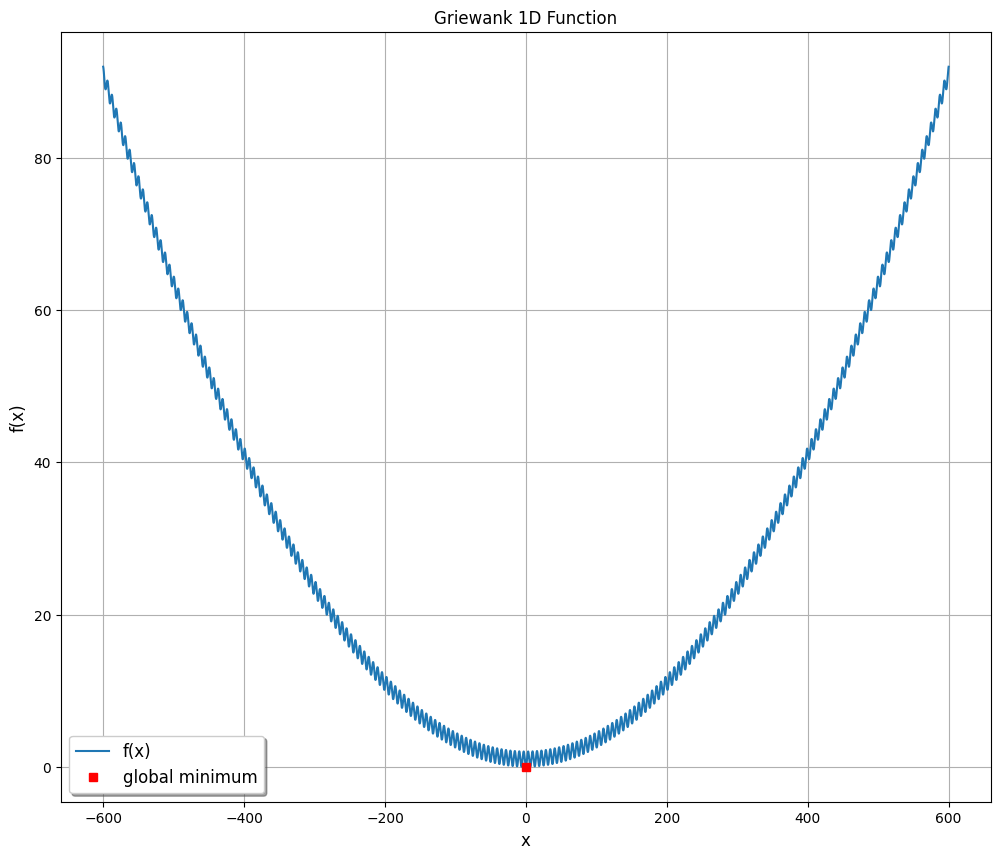

In [16]:
griewank_1d.plot(sa.s_best,'Griewank 1D Function')

# Solving Griewank 2D function using SA

In [17]:
griewank_bounds_2d = np.asarray([[-600, 600]]*2)
griewank_2d=ContinuousFunctionBase(griewank, griewank_bounds_2d, (griewank_bounds_2d[:, 1] - griewank_bounds_2d[:, 0])/10)

sa.run(griewank_2d)

Simulated annealing is initialized:
current value = 2.0507962653348653, current temp=1000
Simulated Annealing is done: 
curr iter: 154, curr best value: 0.14294339507960818, curr temp:9.97938882337113e-05, curr best: sol: [ 6.14558815 -8.2218961 ]


global minimum: x = 6.1456, -8.2219, f(x) = 0.1429


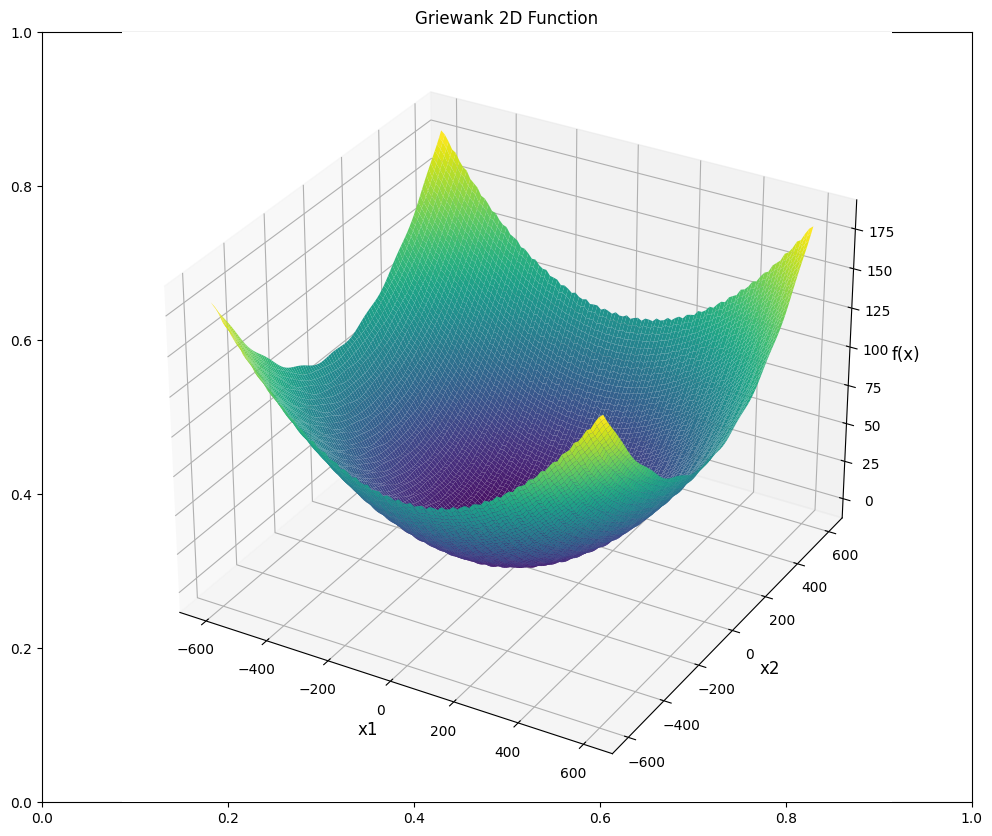

In [18]:
griewank_2d.plot(sa.s_best,'Griewank 2D Function')

# Solving Griewank 3D function using SA

In [19]:
griewank_bounds_3d = np.asarray([[-600, 600]]*3)
griewank_3d=ContinuousFunctionBase(griewank, griewank_bounds_3d, (griewank_bounds_3d[:, 1] - griewank_bounds_3d[:, 0])/10)

# Changing the parameters for SA for more complex problem
sa = SimulatedAnnealing(max_iter=10000, max_iter_per_temp=1000, initial_temp=10000, final_temp=0.0000001, cooling_schedule='linear_inverse', cooling_alpha=0.9, debug=1)

sa.run(griewank_3d)

Simulated annealing is initialized:
current value = 96.07272366525174, current temp=10000
